# Project: Hospital Data Analysis

## Table of Contents
<ul>
  <li><a href="#introduction">Introduction</a></li>
  <li><a href="#wrangling">Data Wrangling</a></li>
  <li><a href="#eda">Exploratory Data Analysis</a></li>
  <li><a href="">Conclusion</a></li>
</ul>

<a id="introduction"></a>
## Introduction
> This analysis focuses on examining the **No-Show appointments** data from Kaggle. In the dataset, about 100,000 medical appointment records from Brazil have been featured. The information captured in the dataset include the patient's **id, Appointment Id, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show**
> ### Definition of important variables.
>> _Gender_: Describes whether the patient is **male** or **female**. <br>
>> _ScheduledDay_: Tells us on what day the patient set up their appointment. <br>
>> _Age_: Indicates the patients age. <br>
>> _Neighbourhood_: Indicates the location of the hospital. <br>
>> _Scholarship_: Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. <br>
>> _Hipertension_: Indicates whether a patient has Hipertension or not <br>
>> _Diabetes_: Indicates whether a patient is diabetic or not. <br>
>> _Alcoholism_: Indicates whether a patient alcoholic or not. <br>
>> _Handcap_: Indicates whether a patient is Handcapped or not. <br>
>> _SMS_received_: Indicates whether a patient received sms notifications about the appointment or not. <br>
>> _No-show_: Indicates whether a patient showed up for their appointment or not. <br>
>>> #### Important Points to Note:
>>>> 1. For the _Scholarship_, _Hipertension_, _Diabetes_, _Alcoholism_, _Handcap_, and _SMS_received_ fields, **1 = Yes** and **0 = No**
>>>> 2. For the _No-show_ field, **No = The patient showed up for the appointment** and **yes = The patient did not show up for the appointment**
> ### Questions to be answered.
>> Q1: Do patients of particular age groups book appointments more frequently than others? <br>
>> Q2: Are male patients more likely to show up for an appointment as compared to female patients? <br>
>> Q3: Are older patients more likely to show up for an appointment as compared to the younger patients? <br>
>> Q4: How do patients from different neighbourhoods differ in terms of showing up for doctor's appointments? <br>
>> Q5: Are patients who are enrolled in Brasilian welfare program more likely to show up for scheduled appointments? <br>
>> Q6: How do positive diagnosis of health conditions such as hipertension, Diabetes, Alcoholism, and Handcap affect appointment attendance? <br>

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id="wrangling"></a>
# Data Wrangling

## General Properties

In [2]:
# Loading the data and set the 'AppointmentID' as the index
df = pd.read_csv('Dataset/appointments_data.csv')

# Verify that the data was loaded successfully
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Examine the datatypes of the data in every column in the dataset
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

> All the numerical columns in the dataset are set as integers while the columns with text data are set to string as required.

In [4]:
# Descrptive summary for patient ages
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

> This summary indicates that the minimum age entry is -1 years while the maximum age entry is 115 years.
> **-1 is not a reasonable age and therefore needs some cleaning attention**

In [5]:
# Examine the number of columns and rows in the data
df.shape

(110527, 14)

> The dataset has 14 columns and 110527 entries

In [6]:
# Check whether the data has any duplicated records
df.duplicated().sum()

0

> The dataset has no duplicated records

In [7]:
# check for records with null values.
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> There are no null values in the dataset.

In [8]:
# Check the number of unique appointments record by appointment id
df['AppointmentID'].nunique()

110527

> There are 110527 unique appoint records in the dataset

In [9]:
# How many unique patients are captured in the dataset?
df['PatientId'].nunique()

62299

> 62,299 unique patients have been captured in the dataset. <br>
> - This shows that some patients set more than one appointments.

In [10]:
# How many appointments were made by patients with hipertension in the dataset?
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

> Of all the appointments that were recorded, 21,810 appointments were made by patients who had hipertension.

In [11]:
# How many appointments were made by patients with Scholarship?
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

> Of all the appointments that were recorded, 10861 appointments were made by patients who had enrolled in Brasilian welfare program Bolsa Família.

In [12]:
# How many appointments were made by patients with alcoholism?
df.Alcoholism.value_counts()


0    107167
1      3360
Name: Alcoholism, dtype: int64

> Of the appointments that were made, 3360 from patients with alcoholism.

In [13]:
# How many appointments were made by patients who had received SMS?
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

> Of all the appointments that were made, 35,482 were made by individuals who received SMS

### _**Cleaning Remarks:**_ The dataset :-
> 1. Does not have any duplicated records. <br>
> 2. Has no null values. <br>
> 3. Has all the columns set to the correct datatypes <br>
> 4. Has one erroneous age entry, **-1**, which needs to be removed. <br>
> 5. Has the last column named **No-show** instead of **No_show**. This needs to be addressed <br>
> 6. Has some columns that we may not be needed in the analysis process. <br>
> 7. Needs to have the `AppointmentId` field set as the index. <br>
**In the data cleaning step, we need to address remarks 4, 5, 6, and 7**

## Data cleaning

In [14]:
# Make a copy of the original dataset
df_new = df.copy()

# Verify that the data was copied successfully
df_new.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [15]:
# Display all the columns for ease of reference
df_new.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

> We need to drop the `AppointmentDay` column.

### Dropping the `AppointmentDay` column

In [16]:
# Drop the columns
df_new.drop(columns='AppointmentDay', axis=1, inplace=True)

# Verify that the columns were dropped successfully
df_new.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

### Dropping the record with an erroneous age entry

In [17]:
# View the Record
odd_age = df_new.query('Age < 0')
odd_age

,PatientId,AppointmentID,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,-1,ROMÃO,0,0,0,0,0,0,No


In [18]:
# Drop the Record
df_new.drop(odd_age.index, inplace=True)

# Verify that the entry was dropped
df_new.query('Age < 0') # This should return an empty dataset if the drop was successful

,PatientId,AppointmentID,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


### Set `AppointmentID` as the index column

In [19]:
df_new.set_index('AppointmentID', inplace=True)

# Confirm that the index was changed successfully
df_new.head(1)

,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Rename the column named `No-show` to `No_show`

In [20]:
#df_new['N-show']=df_new['No_show']
df_new.rename(columns={'No-show':'No_show'}, inplace = True)
df_new.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No_show'],
      dtype='object')

### Save the cleaned dataset in a new csv file.

In [21]:
df_new.to_csv('Dataset/clean_data.csv', index=True)

<a id = "eda"></a>
# Exploratory Data Analysis (EDA)

In [22]:
# Load the cleaned dataset.
df_clean = pd.read_csv('Dataset/clean_data.csv')

# Verify that the data was loaded successfully
df_clean.head(1)

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,5642903,2.987250e+13,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> For this EDA process, when analyzing the data to come up with solutions for the raised questions, we will be needing to work with proportions in multiple occassions. To avoid repetition, it is elegant to define a function that we can invoke any time we want to calculate a proportion. The cell below defines a `proportion function`

In [23]:
# Defining the proportion funtion
def proportion(total, interest_items):
    """
    Description: This is a function that calculates the proportion of items of interest
    
    Inputs:
        total: This is the total number of items to be considered in calculating the proportions
        interest_items: This is the number of items of interest whose proportion needs to be calculated.
    Results:
        prop: This is the result obtained after dividing the interest_items by the total
    """
    if interest_items > total:
        result = "Items of interest must be less than or equal to the total number of items"
    else:
        result = interest_items/total
    return(result)

## Research Question 1: Do patients of particular age groups book appointments more frequently than others?

> To Respond to this question, we need to examine how the ages of the patients who booked appointments in all hospitals are distributed. To do this, we need to visualize the ages using a histogram 

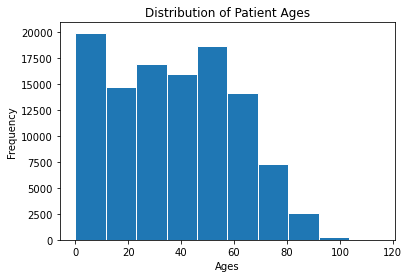

In [24]:
# Check the distribution of the ages of the patients
df_clean.Age.plot(kind= 'hist', edgecolor='white')
plt.title('Distribution of Patient Ages')
plt.xlabel('Ages')
plt.ylabel('Frequency');

> This does not give a clear picture of the distribution of the patient ages because as initially established, several patients made more than one appointment. To get a more accurate visualization, we need to plot the histogram using ages for the unique patients only.

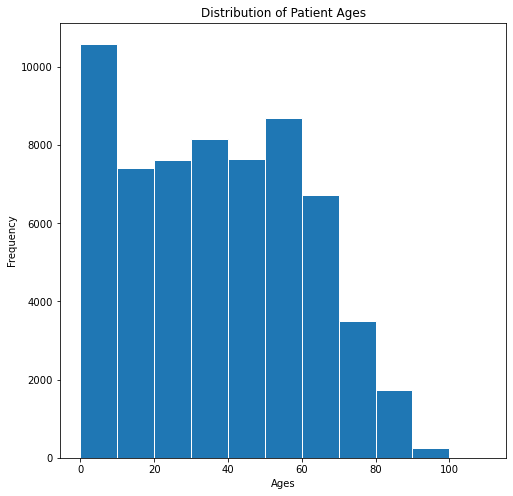

In [25]:
# Extract the data for the unique patients
unique_patients = df_clean.drop_duplicates(subset='PatientId', keep='first')

# Use the ages in this new dataset to examine the distribution of patient ages.
# unique_patients['Age'].plot(kind='hist')
ages = unique_patients['Age']
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
fig, ax = plt.subplots(figsize = (8,8))
ax.hist(ages, bins, edgecolor='white')
plt.title('Distribution of Patient Ages')
plt.xlabel('Ages')
plt.ylabel('Frequency');

### Question 1 Response:
> #### The above visualization reveal that patients aged between 0 to 10 years book a higher number of appointments as compared to the other age groups. The number of appointments booked by patients aged between 90 years and 100 years is disproportionately low as compared to the other age groups.

## Research Question 2: Are male patients more likely to show up for an appointment as compared to female patients?

>To arrive at a conclusive and valid question for this research question, we need to compare the proportion of male patients who showed up for the appointment and the proportion of women who showed up for the appointment

### Step 1: separate the data into two dataframes
    male_df = Dataframe with only the appointments booked by male patients
    female_df = Dataframe with only the appointments booked by female patients

In [26]:
# Extract the appointments booked by males
male_df = df_clean.query('Gender == "M"')
male_df.head(2)

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
1,5642503,5.589978e+14,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
11,5620163,7.542951e+12,M,2016-04-26T08:44:12Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes


In [27]:
# Verify that there are no Female entries in the male dataframe
male_df.query('Gender == "F"')
# This should display an empty dataset if there are no entries that have gender set as female.

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


In [28]:
# Extract the appointments booked by males
female_df = df_clean.query('Gender == "F"')
female_df.head(2)

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,5642903,2.987250e+13,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
2,5642549,4.262962e+12,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [29]:
# Verify that there are no male entries in the female dataframe
female_df.query('Gender == "M"')
# This should display an empty dataset if there are no entries that have gender set as male.

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


### Step 2: Calculate the proportion of male patients who showed up for the appointment

> Based on the description of the proportion function defined above, we need to obtain the **total number of male patients** and **the number of male patients who showed up for the appointments**

In [33]:
# Find the total number of male patients who made appointments
total_males_appointments = male_df.AppointmentID.value_counts().sum()

# Find the number of male patients who showed up for the appointments
No_of_males_who_attended = male_df.query('No_show == "No"').value_counts().sum()

# Print out the obtained values
print(total_males_appointments)
print(No_of_males_who_attended)

38687
30962


In [34]:
# Invoke the proportion function to calculate the proportion of male patients who showed up for the appointments
prop_M_who_showed = proportion(total_males_appointments, No_of_males_who_attended)
prop_M_who_showed

0.8003205211052808

### Step 3: Calculate the proportion of female patients who showed up for the appointment

> This follows the same procedure as step 2 above

In [35]:
# Find the total number of female patients who made appointments
total_females_appointments = female_df.AppointmentID.value_counts().sum()

# Find the number of female patients who showed up for the appointments
No_of_females_who_attended = female_df.query('No_show == "No"').value_counts().sum()

# Print out the obtained values
print(total_females_appointments)
print(No_of_females_who_attended)

71839
57245


In [36]:
# Invoke the proportion function to calculate the proportion
prop_F_who_showed = proportion(total_females_appointments, No_of_females_who_attended)
prop_F_who_showed

0.7968512924734475

> Comparing the results from step 2 and 3, we can tell that the proportion of male patients who showed up for their appointments is slightly higher than that of the female patients. To get a clear picture of how these two proportions vary, we need to visualize them using a bar graph.

### Step 4: Visualize the proportions

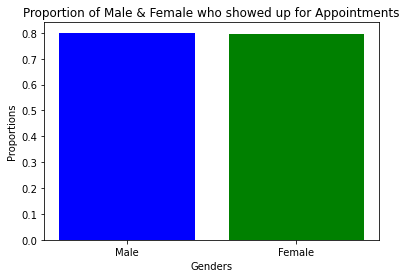

In [41]:
genders = ['Male','Female']
props = [prop_M_who_showed, prop_F_who_showed]
colors = ['blue','Green']
plt.bar(genders, props, color = colors)
plt.title('Proportion of Male & Female who showed up for Appointments')
plt.xlabel('Genders')
plt.ylabel('Proportions')

plt.show();